# Analyzing Employee Exit Surveys

This project will take a look at exit surveys from two distinct departments in Australia, DETE and TAFE. Both datasets contain information on the employees through their ID's, their reason for leaving the job, and their cease date. The aim of this project is to identify patterns that would help us determine whether the employee exits are due to specific dissatisfactions. 

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 4000

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated') 
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
print(dete_survey.isnull().sum())
print("\n")
print(dete_survey['Employment Status'].value_counts())
print("\n")
print(dete_survey['SeparationType'].value_counts())
print("\n")
print(dete_survey['Position'].value_counts())
print("\n")
dete_survey['Age'].value_counts()
print("\n")
dete_survey['Kept informed'].value_counts()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

A     401
SA    162
N     130
D      60
SD     50
M      10
Name: Kept informed, dtype: int64

For the Dete_survey data, more than several columns are missing values, however, the following are missing more than 200 of the column vlaues:
- Classification
- Business Unit
- Aboriginal 
- Torres Strait
- South Sea
- Disability
- NESB
It would be a good idea to remove these columns as they would not contribute to our findings. In addition, It seems that the majority of exits are from full-time positions, majority of which being teachers who are resiging due to retirement. 

In [5]:
tafe_survey.info()
print("\n")
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
print(tafe_survey.isnull().sum())
print("\n")
print(tafe_survey['Employment Type. Employment Type'].value_counts())
print("\n")
print(tafe_survey['Classification. Classification'].value_counts())
print("\n")
print(tafe_survey['Reason for ceasing employment'].value_counts())
print("\n")

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

As seen above, the tafe_survey columns almost all contain null-values with exception to ID, Institute, and Work Area. Several columns have more than 200 null values, which would make it appealing for us to remove these columns alltogether in order to strengthen our findings. According to the survey, the majority of employee exits came from 'Permanent Full timers' who worked in the administration department. In addition, the most common reason for leaving was 'resignation'. 


## Data Cleaning

In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1) # Dropping columns 28 through 49 for lacking enough data
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1) 

dete_survey_updated.info()
print("\n")
tafe_survey_updated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In the above cell we used 'df.drop()' method to get rid of columns which exceeded a certain number of null-values in both surveys. In addition, several columns were deleted as they offered no valuable insight into our goal for this project. For the dete_survey it was columns 28 through 49. For tafe_survey columns 17 through 66 were deleted. 

## Cleaning Column Names

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated = dete_survey_updated.rename({'separationtype':'separation_type'}, axis=1)
dete_survey_updated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separation_type                      822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [9]:
tafe_renamed_columns = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'} 
tafe_survey_updated = tafe_survey_updated.rename(tafe_renamed_columns, axis = 1)
tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace(' ','_').str.replace('.','_').str.replace('-','_').str.replace('__','_')
tafe_survey_updated = tafe_survey_updated.rename({'separationtype':'separation_type','workarea':'work_location'}, axis=1)
tafe_survey_updated.info()
print("\n")
print("\n")
dete_survey_updated.head()
print("\n")
print("\n")
tafe_survey_updated.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 702 non-null    float64
 1   institute                                          702 non-null    object 
 2   work_location                                      702 non-null    object 
 3   cease_date                                         695 non-null    float64
 4   separation_type                                    701 non-null    object 
 5   contributing_factors_career_move__public_sector    437 non-null    object 
 6   contributing_factors_career_move__private_sector   437 non-null    object 
 7   contributing_factors_career_move__self_employment  437 non-null    object 
 8   contributing_factors_ill_health                    437 non-null    object 
 9   contributi

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/763512904.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace(' ','_').str.replace('.','_').str.replace('-','_').str.replace('__','_')


,id,institute,work_location,cease_date,separation_type,contributing_factors_career_move__public_sector,contributing_factors_career_move__private_sector,contributing_factors_career_move__self_employment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Using df.rename() the fllowing columns were renamed in tafe_survey_updated to make the both surveys uniform for future merging:
- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

The columns will help us answer the question, "Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?"


## Filter Data

In [10]:
print(dete_survey_updated['separation_type'].value_counts())
print("\n")
print("\n")
tafe_survey_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64






Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

In [11]:
dete_survey_updated['separation_type'] = dete_survey_updated['separation_type'].str.split('-').str[0] # splitting the values allows us to combine all three types of resignations into one.
dete_survey_updated['separation_type'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separation_type, dtype: int64

In [12]:
dete_resignation = dete_survey_updated[dete_survey_updated['separation_type'] == 'Resignation']
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separation_type'] == 'Resignation']

display(dete_resignation.head())
print("\n")
print("\n")
display(tafe_resignation.head())

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


,id,institute,work_location,cease_date,separation_type,contributing_factors_career_move__public_sector,contributing_factors_career_move__private_sector,contributing_factors_career_move__self_employment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


After cleaning both data sets, we assign the three types of resignations in the dete_survey to one type in order to ease make ease of analysis. Furthermore, we we create copies for each survey dataset using df.copy(). These copies only contain rows in which the Seperation Type is 'Resignation'. This was done in order to supplement our initial question of whether or not outside factors are affecting employees decision to resign.

## Verifying Dates

In [13]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [14]:
cease = dete_resignation['cease_date'].str[-4:]
dete_resignation['cease_date'] = cease.astype(float)
dete_resignation['cease_date'].value_counts()

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/2012901281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignation['cease_date'] = cease.astype(float)


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [15]:
print(dete_resignation['cease_date'].value_counts())
print("\n")
dete_resignation['dete_start_date'].value_counts(ascending=True)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64




1987.0     1
1972.0     1
1975.0     1
1977.0     1
1971.0     1
1973.0     1
1963.0     1
1984.0     1
1982.0     1
1974.0     2
1976.0     2
1983.0     2
2001.0     3
1985.0     3
1986.0     3
1995.0     4
1988.0     4
1991.0     4
1989.0     4
1980.0     5
1990.0     5
1993.0     5
1997.0     5
2002.0     6
1996.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2007.0    21
2012.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [16]:
tafe_resignation['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The cease dates range from 2009-2013. There are much fewer records in 2009, possibly suggesting that data was not collected for the entire year. The DETE survey contained resignations from 2006 to 2014, with some years with no records.

## Length of Service

In [17]:
dete_resignation

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In order to calculate the length of service for the 'dete_resignation' dataset, we can subtract the cease_date column with that of the 'dete_start_date'.

In [18]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

dete_resignation

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/3352277620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']


,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Resignation,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0
14,15,Resignation,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0
16,17,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0
21,22,Resignation,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0


In [19]:
display(dete_resignation['institute_service'].value_counts(ascending=True))
print("\n")
display(tafe_resignation['institute_service'].value_counts())

31.0     1
49.0     1
34.0     1
38.0     1
35.0     1
41.0     1
27.0     1
42.0     1
33.0     1
29.0     1
36.0     2
30.0     2
25.0     2
26.0     2
28.0     2
32.0     3
21.0     3
19.0     3
39.0     3
24.0     4
11.0     4
23.0     4
18.0     5
16.0     5
12.0     6
17.0     6
14.0     6
22.0     6
10.0     6
15.0     7
20.0     7
8.0      8
13.0     8
7.0     13
2.0     14
9.0     14
4.0     16
6.0     17
0.0     20
3.0     20
1.0     22
5.0     23
Name: institute_service, dtype: int64

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

After creating the 'institute_service' column in dete_resignation, we can compare the length's of service for both data sets. in 'dete_resignation', the largest amount of resigners had 5 years or less service at the company. In addition, very few individuals stayed past 10 years. For the tafe_resignation set, the majority of resigners had worked less than a year at the job. Moreover, only 31 individuals worked longer than 7 years there.

## Identifying Dissatisfied Employees

In [20]:
tafe_resignation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 340 non-null    float64
 1   institute                                          340 non-null    object 
 2   work_location                                      340 non-null    object 
 3   cease_date                                         335 non-null    float64
 4   separation_type                                    340 non-null    object 
 5   contributing_factors_career_move__public_sector    332 non-null    object 
 6   contributing_factors_career_move__private_sector   332 non-null    object 
 7   contributing_factors_career_move__self_employment  332 non-null    object 
 8   contributing_factors_ill_health                    332 non-null    object 
 9   contributi

In [21]:
display(tafe_resignation['contributing_factors_dissatisfaction'].value_counts())
print("\n")
display(tafe_resignation['contributing_factors_job_dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors_dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
Name: contributing_factors_job_dissatisfaction, dtype: int64

In [22]:
def update_vals(val):
    if (pd.isnull(val)):
        return np.nan
    elif (val == '-'):
        return False
    else:
        return True

In [23]:
tafe_resignation[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction']] = tafe_resignation[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction']].applymap(update_vals)
tafe_resignation[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction']]

C:\Users\obay\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [24]:
tafe_resignation['dissatisfied'] = tafe_resignation[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction']].any(axis=1, skipna=False)
tafe_resignation['dissatisfied']

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/811372271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignation['dissatisfied'] = tafe_resignation[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction']].any(axis=1, skipna=False)


3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16      True
17      True
18      True
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
45     False
46     False
47      True
49     False
51      True
52      True
53     False
54      True
55     False
56     False
58      True
63     False
64      True
65      True
66     False
69     False
71      True
72     False
74      True
79      True
80     False
81     False
82     False
84     False
85     False
86      True
87     False
88     False
89     False
91     False
92     False
93     False
94     False
96      True
97      True
98      True
100     True
101     True
102     True
103     True
104    False
105    False
107    False
109    False
113     True
114     True
116    False

In [25]:
tafe_resignation_up = tafe_resignation.copy()

In [26]:
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)
dete_resignation_up = dete_resignation.copy()

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/2665393187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)


In [27]:
dete_resignation_up['dissatisfied']
print("\n")
tafe_resignation_up['dissatisfied']

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16      True
17      True
18      True
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
45     False
46     False
47      True
49     False
51      True
52      True
53     False
54      True
55     False
56     False
58      True
63     False
64      True
65      True
66     False
69     False
71      True
72     False
74      True
79      True
80     False
81     False
82     False
84     False
85     False
86      True
87     False
88     False
89     False
91     False
92     False
93     False
94     False
96      True
97      True
98      True
100     True
101     True
102     True
103     True
104    False
105    False
107    False
109    False
113     True
114     True
116    False

In [28]:
dete_resignation_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separation_type                      311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

We created a new column for each dataset in order to identify whether the employees who resigned were dissatisfied or not. The column gathered boolean values of different categories and reported '

## Combining The Data

In [29]:
dete_resignation_up['institute'] = 'DETE' # Creating a new column in with that contain the values 'DETE'
tafe_resignation_up['institute'] = 'TAFE' # Creating a new column in with that contain the values 'TAFE'

In [30]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up], axis=0, ignore_index=True)
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated

,id,separation_type,cease_date,position,employment_status,work_location,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,False,Female,36-40,7.0,False,DETE
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,False,Female,41-45,18.0,True,DETE
2,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,False,Female,31-35,3.0,False,DETE
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,False,Female,46-50,15.0,True,DETE
4,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Male,31-35,3.0,False,DETE
5,1.300000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Female,36-40,14.0,False,DETE
6,1.500000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Male,31-35,5.0,True,DETE
7,1.700000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,False,Male,61 or older,NaN,True,DETE
8,2.100000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Male,56-60,30.0,False,DETE
9,2.200000e+01,Resignation,2012.0,Cleaner,Permanent Part-time,False,Female,51-55,32.0,False,DETE


Above we combined both survey datasets into one using the concat function and used the df.dropna fxn to remove the columns that contained less than 500 non-null values. This was done to only preserve the columns that would be useful for analysis in the future.

# Cleaning The Service Column

In [31]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [32]:
combined_updated['institute_service'].astype(str)
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [33]:
combined_updated['institute_service'] = (combined_updated['institute_service'].astype('str').str.extract(r"(\d+)").astype('float'))
combined_updated['institute_service'] 

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/1820173961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = (combined_updated['institute_service'].astype('str').str.extract(r"(\d+)").astype('float'))


0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
7       NaN
8      30.0
9      32.0
10     15.0
11     39.0
12     17.0
13      7.0
14      9.0
15      6.0
16      1.0
17      NaN
18     35.0
19     38.0
20      1.0
21     36.0
22      3.0
23      3.0
24     19.0
25      4.0
26      9.0
27      1.0
28      6.0
29      1.0
30      5.0
31     26.0
32     10.0
33      1.0
34      6.0
35     10.0
36      8.0
37      NaN
38      4.0
39      8.0
40      5.0
41     15.0
42     36.0
43      2.0
44      0.0
45     32.0
46      0.0
47      5.0
48     18.0
49      8.0
50      NaN
51      5.0
52      9.0
53      1.0
54      9.0
55      7.0
56      0.0
57     14.0
58      7.0
59      6.0
60     17.0
61     23.0
62      NaN
63      7.0
64      4.0
65      6.0
66      5.0
67     26.0
68     13.0
69     16.0
70      3.0
71     18.0
72      3.0
73      6.0
74      1.0
75      7.0
76     12.0
77      4.0
78      7.0
79      0.0
80      5.0
81      4.0
82      2.0
83  

In [34]:
def stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3.0:
        return "New"
    elif 3.0 <= val <= 6.0:
        return "Experienced"
    elif 7.0 <= val <= 10.0:
        return "Established"
    else:
        return "Veteran"

In [35]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(stage)

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/2094474949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service'].apply(stage)


In [36]:
combined_updated

,id,separation_type,cease_date,position,employment_status,work_location,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,False,Female,36-40,7.0,False,DETE,Established
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,False,Female,41-45,18.0,True,DETE,Veteran
2,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,False,Female,31-35,3.0,False,DETE,Experienced
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,False,Female,46-50,15.0,True,DETE,Veteran
4,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Male,31-35,3.0,False,DETE,Experienced
5,1.300000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Female,36-40,14.0,False,DETE,Veteran
6,1.500000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Male,31-35,5.0,True,DETE,Experienced
7,1.700000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,False,Male,61 or older,NaN,True,DETE,NaN
8,2.100000e+01,Resignation,2012.0,Teacher,Permanent Full-time,False,Male,56-60,30.0,False,DETE,Veteran
9,2.200000e+01,Resignation,2012.0,Cleaner,Permanent Part-time,False,Female,51-55,32.0,False,DETE,Veteran


'service_cat' column was added to the updated combined dataset and it shows the experience level of the employees who resigned. The following were used to determine the values:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

## Perform Initial Analysis

In [37]:
#combined_updated['dissatisfied'].value_counts(dropna=False)
combined_updated['dissatisfied'].fillna(False)

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7       True
8      False
9      False
10      True
11      True
12      True
13     False
14      True
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
30     False
31     False
32      True
33      True
34      True
35     False
36      True
37      True
38     False
39     False
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49     False
50     False
51     False
52      True
53     False
54      True
55      True
56      True
57      True
58      True
59      True
60     False
61     False
62     False
63      True
64     False
65      True
66     False
67      True
68     False
69      True
70      True
71      True
72     False
73     False
74     False
75      True
76      True

In [38]:
combined_updated['dissatisfied'].isnull().sum() # We have replaced the missing values in this column with "False" as it was the more occuring than "True" initially

0

In [39]:
#combined_updated['service_cat'].isnull().sum()
combined_updated['service_cat'].value_counts(dropna=False)
combined_updated['service_cat'] = combined_updated['service_cat'].fillna('New') # replacing the missing values with 'New' as it was the most common service category

C:\Users\obay\AppData\Local\Temp/ipykernel_11168/935728009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['service_cat'].fillna('New') # replacing the missing values with 'New' as it was the most common service category


In [40]:
combined_updated['service_cat'].value_counts() 

New            281
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [42]:
combined_pivot = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

In [44]:
order = [2,1,0,3]
#create a dictionary and fill in the correct order:
mydata = {'dissatisfied':[]}
for i in order:
    mydata['dissatisfied'].append(combined_pivot['dissatisfied'][i])

myindex = ['New', 'Experienced', 'Established', 'Veteran']    
mydf = pd.DataFrame(mydata, index=myindex) #convert to dataframe
mydf

,dissatisfied
New,0.323843
Experienced,0.343023
Established,0.516129
Veteran,0.485294


<AxesSubplot:title={'center':'Proportion of Resignations Due to Dissatisfaction by Length of Service'}>

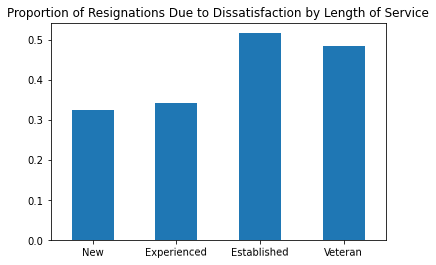

In [45]:
%matplotlib inline
mydf.plot(kind='bar', title='Proportion of Resignations Due to Dissatisfaction by Length of Service', legend=False, label='Career Stage', rot=0.5)

For these data, 1 represents 100% of the employees who have resigned. As established above, New employees have spent less than 3 years at the company, Experienced employees have 3 to 6 years, Established ones have 7 to 10, and Veteran ones have more than 11 years experience at the company. The barplot shows that of the Established employees who left the job, 45% resigned to job dissatisfaction. New and Experienced employees who resigned were equally likely to give dissatisfaction as the reason (about 27%). Veteran employees were more likely to give dissatisfaction as their resignation reason (37%) than New and Experienced employees, but not as likely as Established ones.